In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal,Lorentzian,Quantile_Normal,Quantile_Lorentzian
from scipy.signal import find_peaks
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Get_groups import phase_diagram
import parmap
from tqdm.notebook import tqdm


In [2]:
P_ = phase_diagram(seed = 10,N = 500,m = 6, t_end = 500,)

In [3]:
Ks = np.arange(0,10+0.2/2,0.2)

In [12]:
Ks = np.linspace(1,5,51)
ms = np.linspace(0,7,7)
KK,MM = np.meshgrid(Ks,ms)

df = pd.DataFrame({'r':[0],'rstd':[0],'g1':[0],'g2':[0],'g3':[0],'g4':[0],'g5':[0]
                   ,'g1_std':[0],'g2_std':[0],'g3_std':[0],'g4_std':[0],'g5_std':[0],'K':Ks[0],'m':ms[0]})
df_Km = df.set_index(['K','m'])

In [13]:
for m,test in zip(ms,parmap.map(P_.hysteresis,ms,Ks=Ks,way='F', pm_pbar=False, pm_processes=8)):
    r,rstd,g,gstd =test
    for i,K in enumerate(Ks):
        df_Km.loc[(K,m),:]=[r[i],rstd[i],*g[i],*gstd[i]]

In [7]:
Ks = np.linspace(1,5,5)
m = 5
r,rstd,g,gstd = P_.hysteresis(m,Ks)

In [9]:
r,rstd,g,gstd

([0.04334268457916113,
  0.04236663907826581,
  0.4524272545164966,
  0.6118758094577195,
  0.7391341268909174],
 [0.02508095276521848,
  0.025506739524476144,
  0.030157584573529496,
  0.025951121760122372,
  0.02199201976428259],
 [array([18.822, 14.088, 11.736, 10.516,  9.956]),
  array([25.21 , 17.46 , 14.038, 14.   , 13.72 ]),
  array([263.004,  12.934,  10.234,   8.722,   7.95 ]),
  array([337.664,  10.362,   9.86 ,   9.362,   8.558]),
  array([391.   ,  12.308,   6.116,   5.192,   4.988])],
 [array([3.45981445, 1.03742759, 1.29703662, 0.69695337, 0.59166207]),
  array([2.48312303, 0.49839743, 0.22035426, 0.        , 0.44899889]),
  array([1.58113377, 1.00481043, 1.1607084 , 1.14048937, 0.985647  ]),
  array([0.47233886, 0.48057882, 0.43863424, 0.7422641 , 0.67426701]),
  array([0.        , 0.46166655, 0.56084222, 0.39387308, 0.19963968])])

In [67]:
K_rf = np.array(K_r[0])
K_rb = np.array(K_r[1])
K_rstdf = np.array(K_rstd[0])
K_rstdb = np.array(K_rstd[1])
K_gf = np.array(K_g[0])
K_gb = np.array(K_g[1])
K_g_stdf = np.array(K_g_std[0])
K_g_stdb = np.array(K_g_std[1])

In [20]:
def df_to_mesh(df,N=500):
    col = df.columns
    temp_dict = {}
    KK = df.index.to_frame().K.unstack().to_numpy().T
    MM = df.index.to_frame().m.unstack().to_numpy().T
    temp_dict['KK'] = KK
    temp_dict['MM'] = MM
    for co in col:
        temp = df.unstack()[co].to_numpy().T
        temp_dict[co] = temp
    temp_dict['g2+g3'] = temp_dict['g2'] + temp_dict['g3']
    temp_dict['g2+g3+g4'] = temp_dict['g2'] + temp_dict['g3']+temp_dict['g4']
    temp_dict['g2+g3_percent'] = temp_dict['g2+g3']/N*100
    return temp_dict

    

In [21]:
def df_to_draw(df,fig,row=1,col=5,lev = 20):
    axs = fig.subplots(row,col,sharex=True,sharey=True)
    df_list = ['r', 'rstd', 'g1', 'g2','g3','g2+g3', 'g4', 'g5']
    temp_dict = df_to_mesh(df)
    KK = temp_dict['KK']
    MM = temp_dict['MM']
    origin='lower'
    for ax,obj in zip(axs,df_list):
        plt.sca(ax)
        to_draw = temp_dict[obj]
        CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
        CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
        plt.colorbar(CS)
        plt.clabel(CS2, inline=1, fontsize=10,colors='white')
        plt.title(f'{obj}')
    fig.supxlabel(r'$K$: coupling constant')
    fig.supylabel(r'$m$: inertia',x=0.01)
    fig.tight_layout()

def df_to_groups(df,fig,row=1,col=6,lev = 20):
    axs = fig.subplots(row,col,sharex=True,sharey=True)
    df_list = ['g1','g1_std','g2','g2_std', 'g3','g3_std']
    temp_dict = df_to_mesh(df)
    KK = temp_dict['KK']
    MM = temp_dict['MM']
    origin='lower'
    for ax,obj in zip(axs,df_list):
        plt.sca(ax)
        to_draw = temp_dict[obj]
        CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
        CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
        plt.colorbar(CS)
        plt.clabel(CS2, inline=1, fontsize=10,colors='white')
        plt.title(f'{obj}')
    plt.tight_layout()

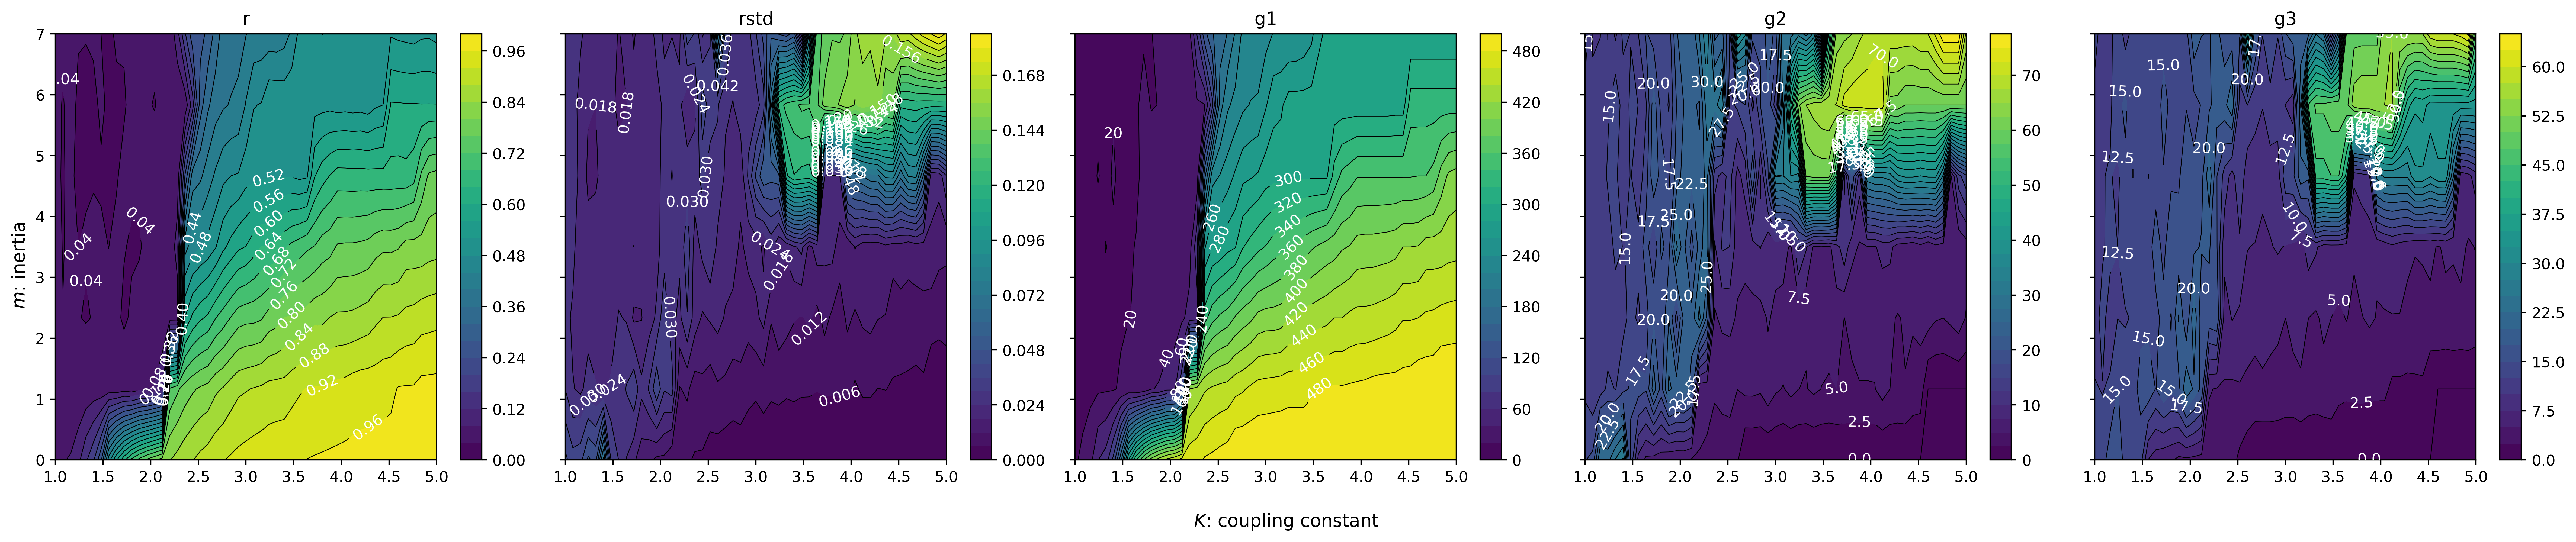

In [22]:
fig = plt.figure(figsize=(24,5),dpi=400)
df_to_draw(df_Km,fig,col=5,lev=30)
# plt.suptitle(r'N = 1000, seed = 10, $t_{end}$=3000',y=0.96)
fig.tight_layout() 

In [10]:
D_ = DD(6)

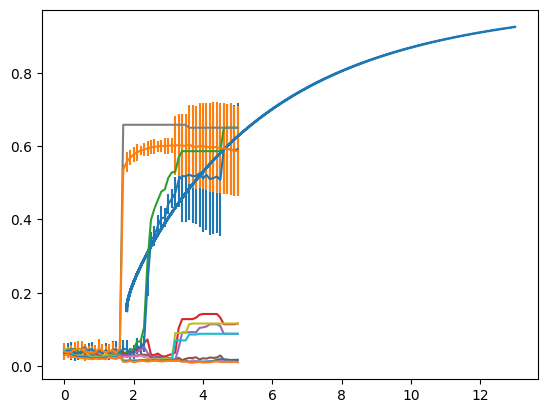

In [59]:
plt.errorbar(Ks,K_r[:51],K_rstd[:51])
plt.errorbar(Ks,K_r[:50:-1],K_rstd[:50:-1])

D_.foward()
plt.plot(Ks,K_g[:51]/500,)
plt.plot(Ks,K_g[:50:-1]/500,)

In [13]:
N = 500
seed = 10
K = 10 
m = 5
t_end = 500
t = np.arange(0,t_end+0.1/2,0.1)
theta_init,omega,_ = Normal(N,0,1,seed=seed)
omega = np.sort(omega) 
theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= omega,p_omega=omega,result_time=4000)

In [16]:
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [17]:
avg_dtheta.shape

(501, 500)